# 1. Learning curve

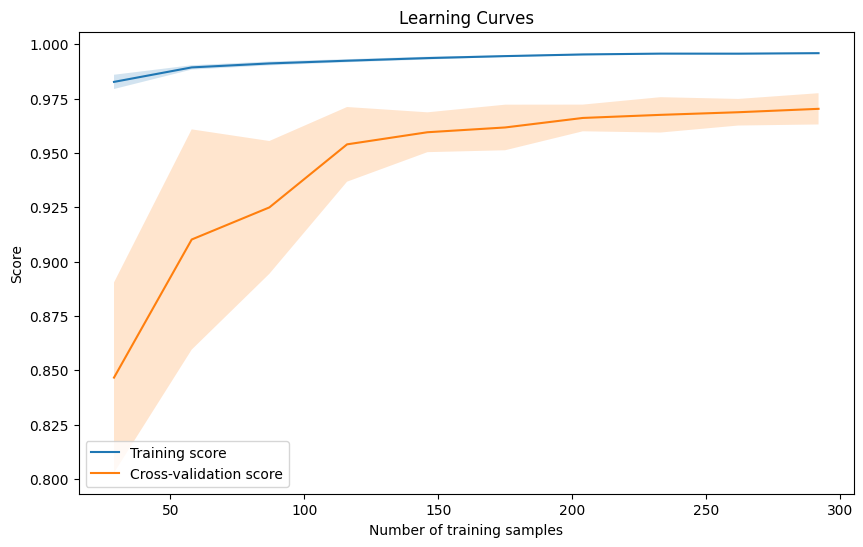

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('truck_fuel_efficiency_dataset.csv', index_col='Date')

# Split the data into features (X) and target (y)
X = data.drop('Fuel_Efficiency_kmpl', axis=1)
y = data['Fuel_Efficiency_kmpl']

# Initialize a Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend()
plt.title('Learning Curves')
plt.show()


# 2. Validation curve

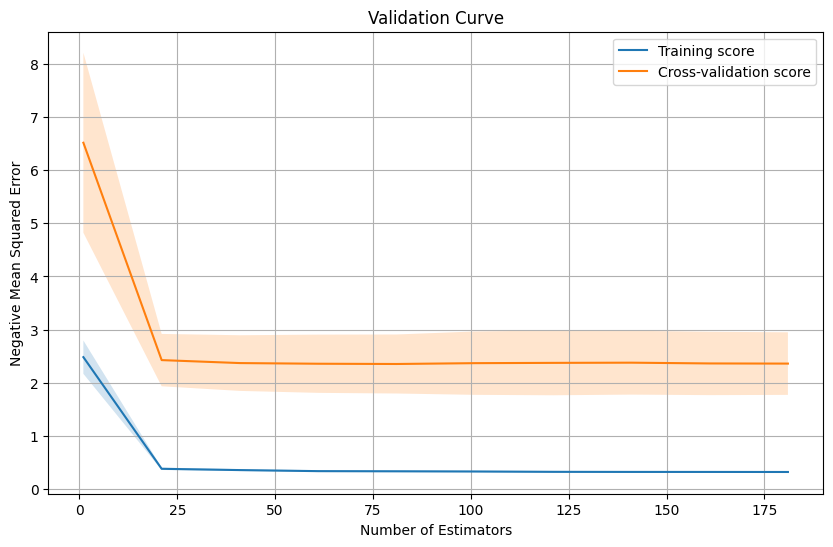

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
data = pd.read_csv('truck_fuel_efficiency_dataset.csv', index_col='Date')

# Split the data into features (X) and target (y)
X = data.drop('Fuel_Efficiency_kmpl', axis=1)
y = data['Fuel_Efficiency_kmpl']

# Define parameter values to test
param_range = np.arange(1, 200, 20)

# Initialize a Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Generate validation curves
train_scores, test_scores = validation_curve(model, X, y, param_name="n_estimators", param_range=param_range, cv=5, scoring="neg_mean_squared_error")

# Convert scores to positive values
train_scores = -train_scores
test_scores = -test_scores

# Plot validation curves
plt.figure(figsize=(10, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.fill_between(param_range, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                 np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.2)
plt.fill_between(param_range, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                 np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), alpha=0.2)
plt.xlabel('Number of Estimators')
plt.ylabel('Negative Mean Squared Error')
plt.title('Validation Curve')
plt.legend()
plt.grid(True)
plt.show()


# Learning curve interpretations

### 1. Early Stopping Point:
Imagine you're training a text classification model to categorize news articles into different topics. As you increase the amount of training data, the accuracy of both the training and validation sets increases. However, after a certain point, you notice that adding more data doesn't lead to a significant improvement in accuracy. This could be an indication that the model has learned as much as it can from the available data, and adding more data might not result in substantial performance gains.

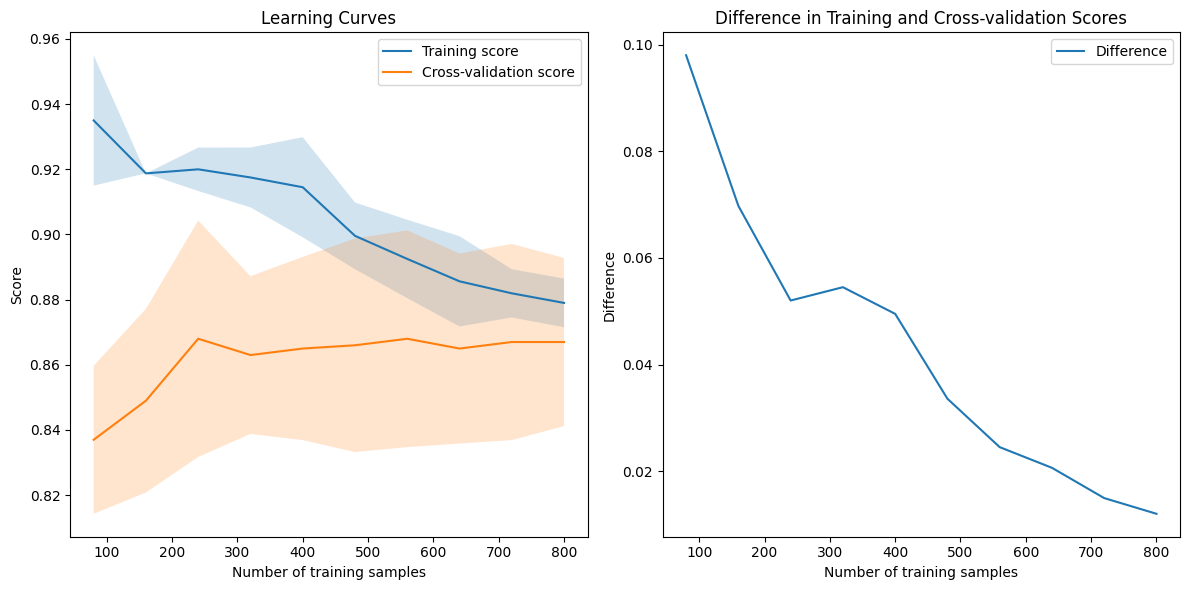

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Initialize a logistic regression model
model = LogisticRegression()

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean scores and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 6))

# Plot training and cross-validation scores
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(
    train_sizes,
    train_mean - train_std,
    train_mean + train_std,
    alpha=0.2
)
plt.fill_between(
    train_sizes,
    test_mean - test_std,
    test_mean + test_std,
    alpha=0.2
)
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend()
plt.title('Learning Curves')

# Plot the difference between training and cross-validation scores
plt.subplot(1, 2, 2)
plt.plot(train_sizes, train_mean - test_mean, label='Difference')
plt.xlabel('Number of training samples')
plt.ylabel('Difference')
plt.legend()
plt.title('Difference in Training and Cross-validation Scores')

plt.tight_layout()
plt.show()


### 2. Convergence:
Suppose you're training an image recognition model to classify various objects in photographs. As you gradually increase the training data, you observe that both the training accuracy and validation accuracy are consistently high and very close to each other. This suggests that the model is learning well from the data and is able to generalize its findings to new, unseen examples.

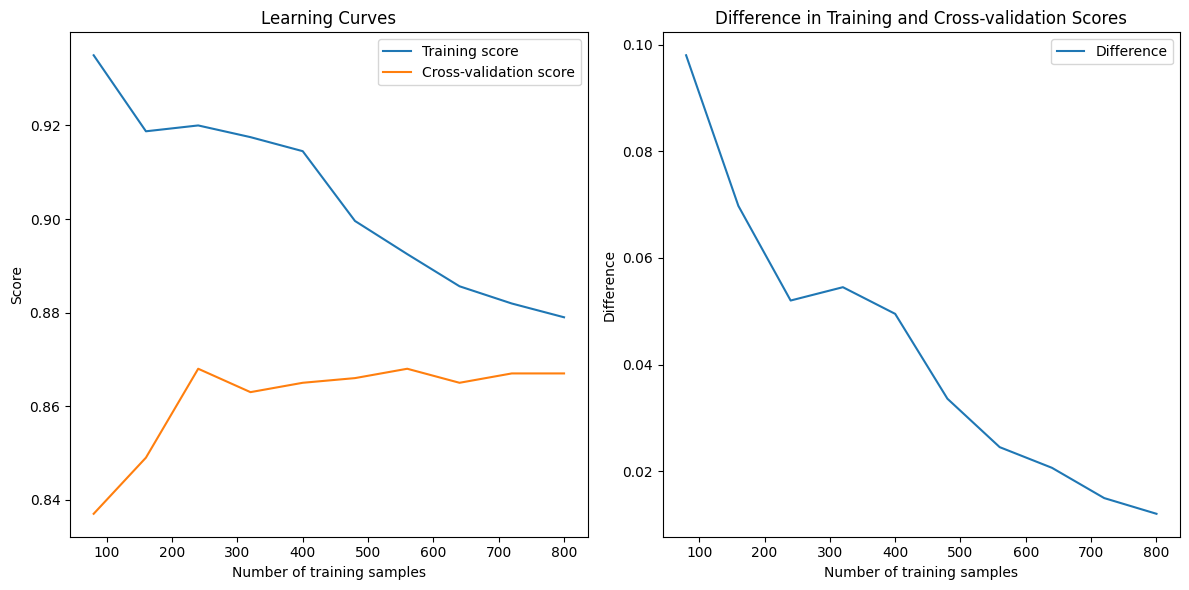

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Initialize a logistic regression model
model = LogisticRegression()

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 6))

# Plot training and cross-validation scores
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend()
plt.title('Learning Curves')

# Plot the difference between training and cross-validation scores
plt.subplot(1, 2, 2)
plt.plot(train_sizes, train_mean - test_mean, label='Difference')
plt.xlabel('Number of training samples')
plt.ylabel('Difference')
plt.legend()
plt.title('Difference in Training and Cross-validation Scores')

plt.tight_layout()
plt.show()


### 3. Overfitting:
Imagine you're training a model to predict housing prices based on various features such as square footage, number of bedrooms, etc. Initially, the training accuracy increases significantly as you add more data, but the validation accuracy starts to plateau or even decrease slightly. This indicates that the model is starting to overfit the training data, capturing noise and outliers that don't generalize well to new data. The increasing gap between the training and validation curves is a sign of overfitting.

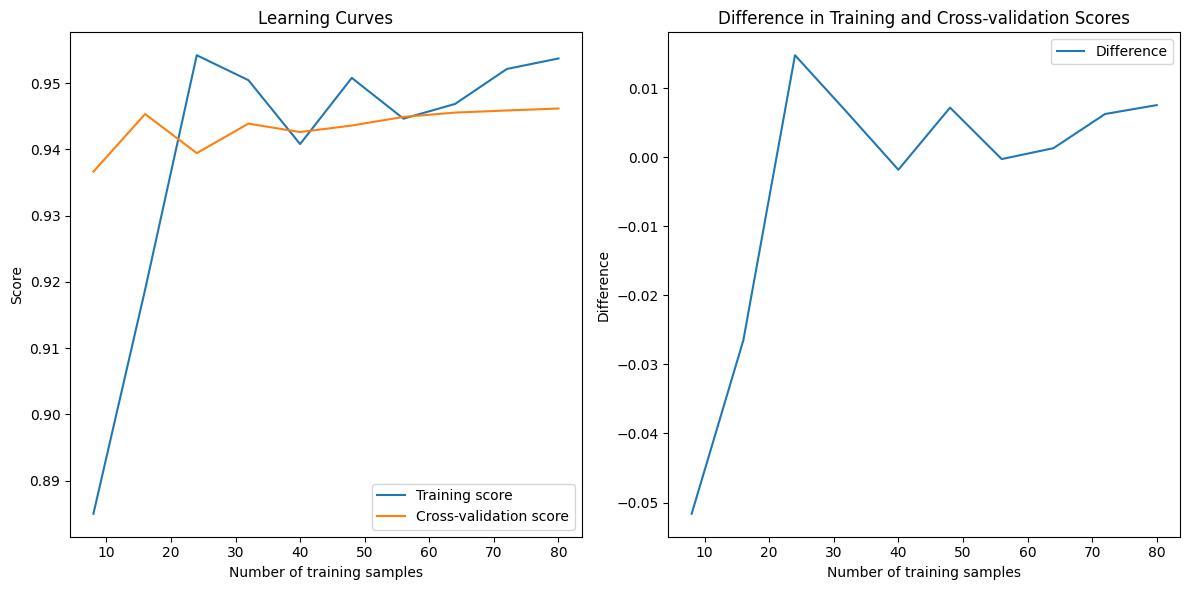

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Create a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Initialize a linear regression model
model = LinearRegression()

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 6))

# Plot training and cross-validation scores
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend()
plt.title('Learning Curves')

# Plot the difference between training and cross-validation scores
plt.subplot(1, 2, 2)
plt.plot(train_sizes, train_mean - test_mean, label='Difference')
plt.xlabel('Number of training samples')
plt.ylabel('Difference')
plt.legend()
plt.title('Difference in Training and Cross-validation Scores')

plt.tight_layout()
plt.show()


# 2. Validation curve interpretations

### 1. Overfitting/Underfitting:
Suppose you're training a model for sentiment analysis on text data. You vary the complexity of the model by adjusting the depth of a decision tree classifier. As you increase the tree's depth, the training accuracy increases significantly, but the validation accuracy starts to decrease. This suggests that with higher tree depth, the model starts capturing noise and becomes more complex, leading to overfitting. On the other hand, with low tree depth, both training and validation accuracies are low, indicating underfitting.

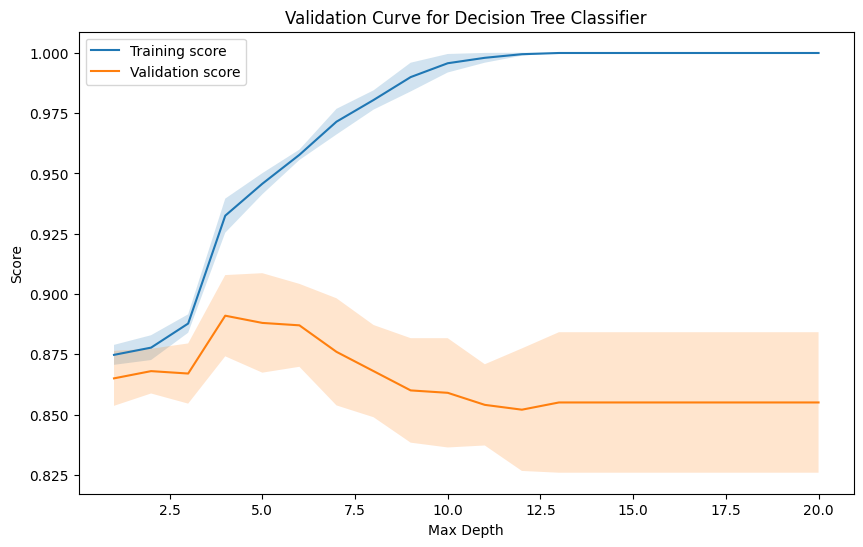

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Vary the tree depth to create the validation curve
param_range = np.arange(1, 21)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(random_state=42), X, y, 
    param_name="max_depth", param_range=param_range, cv=5, scoring="accuracy"
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score")
plt.plot(param_range, test_mean, label="Validation score")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.legend()
plt.title("Validation Curve for Decision Tree Classifier")
plt.show()


### 2. Optimal Hyperparameter:
Imagine you're working on a support vector machine (SVM) classification model for image recognition. You want to find the optimal value for the regularization parameter C. You generate a validation curve by varying C over a range of values. The validation curve shows that the validation accuracy is highest at a certain value of C. This value represents the optimal setting for the regularization parameter, providing the best trade-off between bias and variance.


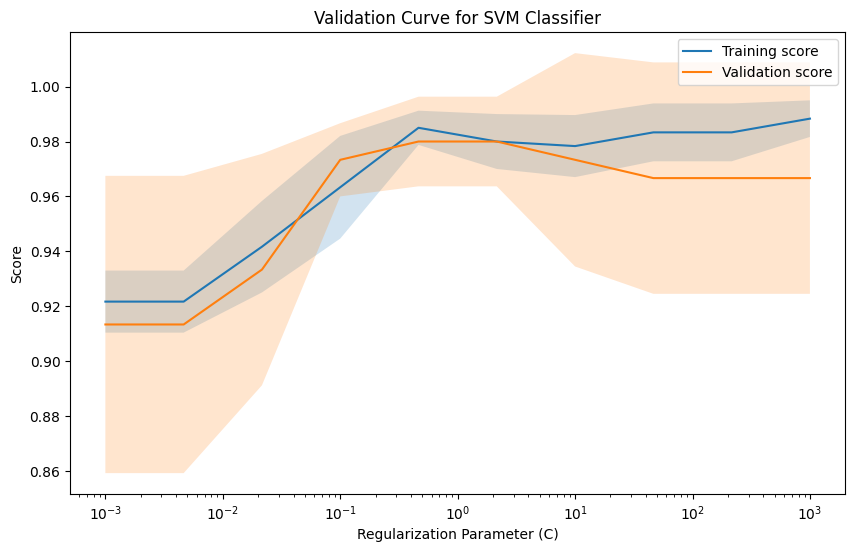

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC

# Load the Iris dataset
X, y = load_iris(return_X_y=True)

# Vary the regularization parameter C to create the validation curve
param_range = np.logspace(-3, 3, 10)
train_scores, test_scores = validation_curve(
    SVC(kernel='linear', random_state=42), X, y, 
    param_name="C", param_range=param_range, cv=5, scoring="accuracy"
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.semilogx(param_range, train_mean, label="Training score")
plt.semilogx(param_range, test_mean, label="Validation score")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel("Regularization Parameter (C)")
plt.ylabel("Score")
plt.legend()
plt.title("Validation Curve for SVM Classifier")
plt.show()
